# Visão geral e pré-processamento dos dados

Esse notebook contém uma visão geral dos datasets selecionados e o seu pré-processamento.

In [2]:
# Importando as bibliotecas mais básicas que vou usar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Datasets escolhidos, pré-processamento e análise exploratória de dados

#### Dataset 1: [Polycistic Ovary Syndrome - PCOS](https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos?select=PCOS_data_without_infertility.xlsx)

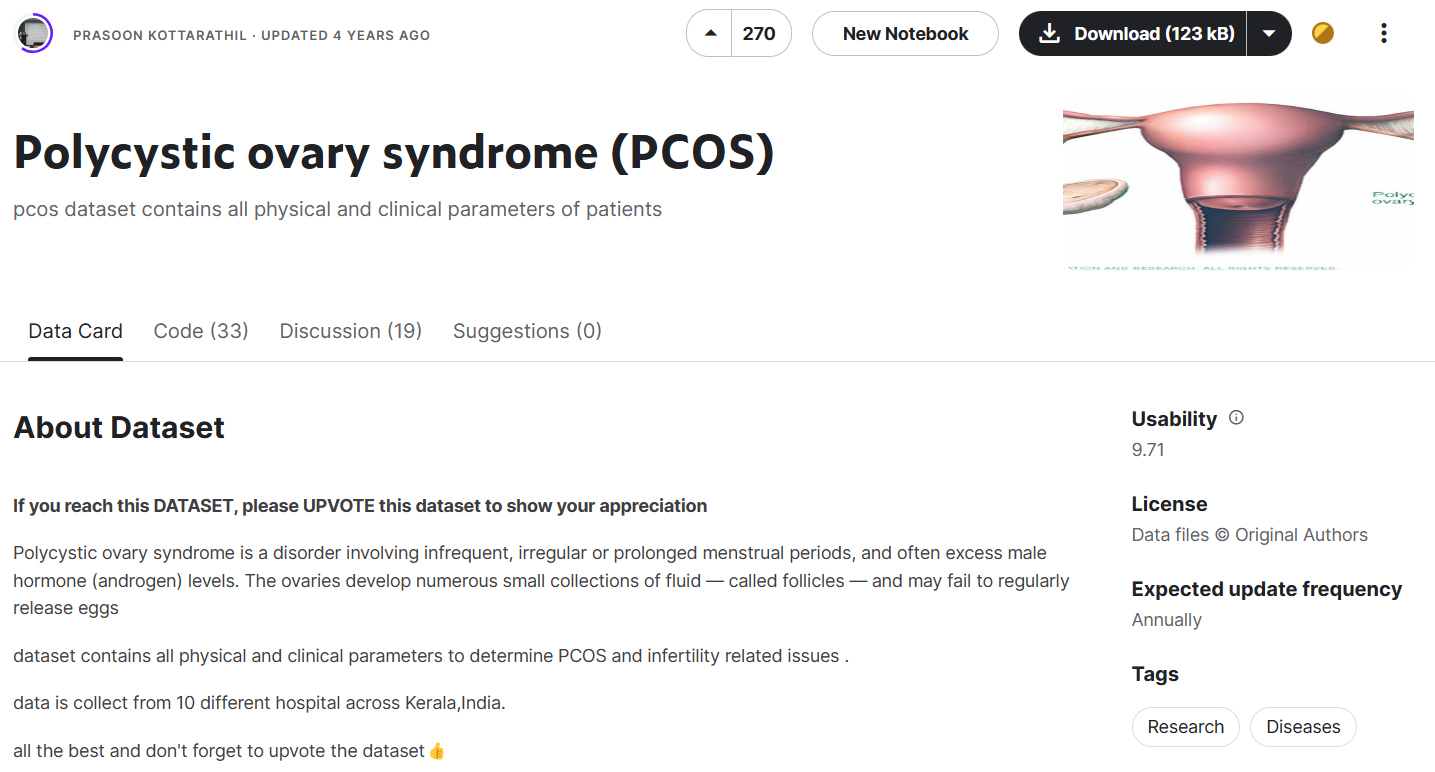

Os dataset 1 [Polycistic Ovary Syndrome - PCOS](https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos?select=PCOS_data_without_infertility.xlsx) contém dados de portadoras ou não de Síndrome do Ovário Policístico SOP, de 10 hospitais diferentes na Índia. Os dados utilizados representam as respostas a um questionário de mulheres diagnosticadas ou não com PCOS, relacionando diversos achados clínicos de cada paciente. O dataset subdivide-se em pacientes sem infertilidade e com infertilidade, mas os dados para as pacientes inférteis têm poucos atributos e, por este motivo, foram excluídos desta análise.

Embora não tenha sido publicado em conjunto com um artigo, esse conjunto de dados já foi utilizado em diversos artigos publicados, o que valida sua qualidade.

##### Importando dados e exibindo

In [3]:
dataset_1 = pd.read_excel("../data/dataset1-pcos-wo_infertility.xlsx",  sheet_name=1)
dataset_1.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


Esse dataset tem inúmeras features, envolvendo exames de sangue e até mesmo informações sobre achados ultrassonográficos (número de folículos ovarianos em cada ovário, tamanho dos folículos). Por isso, ele é um conjunto de dados com informações muito ricas, que contém variáveis associadas a todos os sintomas da SOP que abordamos anteriormente.

Apesar disso, é importante levar em conta que informações tão completas são, em alguns casos, difíceis de obter. Dados como esses poderiam ser úteis se pensarmos em sistemas de apoio à decisão em um cenário de pacientes já com suspeita da SOP, em que tivessem sido coletados já inúmeros exames e informações. Poderíamos usar modelos de aprendizado de máquina para gerar uma segunda opinião em relação ao diagnóstico médico, por exemplo.

##### Pré-processamento e Análise Exploratória dos Dados

Nossa proposta, nesse projeto, é usar dados de dois datasets distintos, e por isso, foi necessário descartar muitas das features do dataset 1, selecionando apenas aquelas também presentes no dataset 2.

In [4]:
dataset_1 = dataset_1.rename(columns={" Age (yrs)": "Idade",
                                      "Weight (Kg)": "Peso",
                                      "Height(Cm) ": "Altura",
                                      "Cycle(R/I)": "Menstruação regular",
                                      "Weight gain(Y/N)": "Ganho de peso",
                                      "Skin darkening (Y/N)": "Hiperpigmentação da pele",
                                      "Hair loss(Y/N)": "Queda de cabelo",
                                      "Pimples(Y/N)": "Acne",
                                      "Fast food (Y/N)": "Fast food regular",
                                      "Reg.Exercise(Y/N)": "Atividade física regular",
                                      "PCOS (Y/N)": "Diagnóstico SOP",
                                      "Cycle length(days)": "Duração do período menstrual",
                                      "hair growth(Y/N)": "Hirsutismo",
                                      'Blood Group': 'Grupo ABO'
                                     })

discard_columns = ['Sl. No', 'Patient File No.', 'BMI', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
                       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', '  I   beta-HCG(mIU/mL)',
                       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
                       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
                       'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
                       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
                       'Unnamed: 44']

dataset_1 = dataset_1.drop(columns=discard_columns)

In [5]:
dataset_1 = dataset_1[sorted(dataset_1.columns)]

dataset_1.info()
dataset_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Acne                          541 non-null    int64  
 1   Altura                        541 non-null    float64
 2   Atividade física regular      541 non-null    int64  
 3   Diagnóstico SOP               541 non-null    int64  
 4   Duração do período menstrual  541 non-null    int64  
 5   Fast food regular             540 non-null    float64
 6   Ganho de peso                 541 non-null    int64  
 7   Grupo ABO                     541 non-null    int64  
 8   Hiperpigmentação da pele      541 non-null    int64  
 9   Hirsutismo                    541 non-null    int64  
 10  Idade                         541 non-null    int64  
 11  Menstruação regular           541 non-null    int64  
 12  Peso                          541 non-null    float64
 13  Queda

,Acne,Altura,Atividade física regular,Diagnóstico SOP,Duração do período menstrual,Fast food regular,Ganho de peso,Grupo ABO,Hiperpigmentação da pele,Hirsutismo,Idade,Menstruação regular,Peso,Queda de cabelo
0,0,152.0,0,0,5,1.0,0,15,0,0,28,2,44.6,0
1,0,161.5,0,0,5,0.0,0,15,0,0,36,2,65.0,0
2,1,165.0,0,1,5,1.0,0,11,0,0,33,2,68.8,1
3,0,148.0,0,0,5,0.0,0,13,0,0,37,2,65.0,0
4,0,161.0,0,0,5,0.0,0,11,0,0,25,2,52.0,1


In [6]:
dataset_1['Menstruação regular'].value_counts()

Menstruação regular
2    390
4    150
5      1
Name: count, dtype: int64

De acordo com usuários do Kaggle, o valor 4 representa uma menstruação regular neste dataset, e 2 representa irregularidade nos ciclos. O valor 5 em um dos exemplos aparenta ser apenas um erro, mas por segurança, optou-se pela exclusão dessa instância.

Obs: o autor do dataset, em si, não explica isso, o que é uma falha na documentação do dataset. Mas em muitos notebooks de usuários, com muitos upvotes, observei isso, então acredito que esteja correto.

In [7]:
dataset_1['Menstruação regular'] = dataset_1['Menstruação regular'].replace({4: 0, 2: 1})
dataset_1 = dataset_1[dataset_1['Menstruação regular'] != 5]
dataset_1['Menstruação regular'].value_counts()

Menstruação regular
1    390
0    150
Name: count, dtype: int64

In [8]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 540
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Acne                          540 non-null    int64  
 1   Altura                        540 non-null    float64
 2   Atividade física regular      540 non-null    int64  
 3   Diagnóstico SOP               540 non-null    int64  
 4   Duração do período menstrual  540 non-null    int64  
 5   Fast food regular             539 non-null    float64
 6   Ganho de peso                 540 non-null    int64  
 7   Grupo ABO                     540 non-null    int64  
 8   Hiperpigmentação da pele      540 non-null    int64  
 9   Hirsutismo                    540 non-null    int64  
 10  Idade                         540 non-null    int64  
 11  Menstruação regular           540 non-null    int64  
 12  Peso                          540 non-null    float64
 13  Queda de c

Eliminando instância (somente uma) com valor ausente na feature Fast food regular:

In [10]:
dataset_1.dropna(subset=["Fast food regular"], inplace=True)

dataset_1["Fast food regular"] = dataset_1["Fast food regular"].astype(int)

dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 0 to 540
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Acne                          539 non-null    int64  
 1   Altura                        539 non-null    float64
 2   Atividade física regular      539 non-null    int64  
 3   Diagnóstico SOP               539 non-null    int64  
 4   Duração do período menstrual  539 non-null    int64  
 5   Fast food regular             539 non-null    int32  
 6   Ganho de peso                 539 non-null    int64  
 7   Grupo ABO                     539 non-null    int64  
 8   Hiperpigmentação da pele      539 non-null    int64  
 9   Hirsutismo                    539 non-null    int64  
 10  Idade                         539 non-null    int64  
 11  Menstruação regular           539 non-null    int64  
 12  Peso                          539 non-null    float64
 13  Queda de c

Exportando os dados pré-processados:

In [11]:
dataset_1.to_csv('../data/dataset1-preproc.csv', index=False)

#### Dataset 2: [PCOS 2023 Dataset](https://www.kaggle.com/datasets/sahilkoli04/pcos2023)



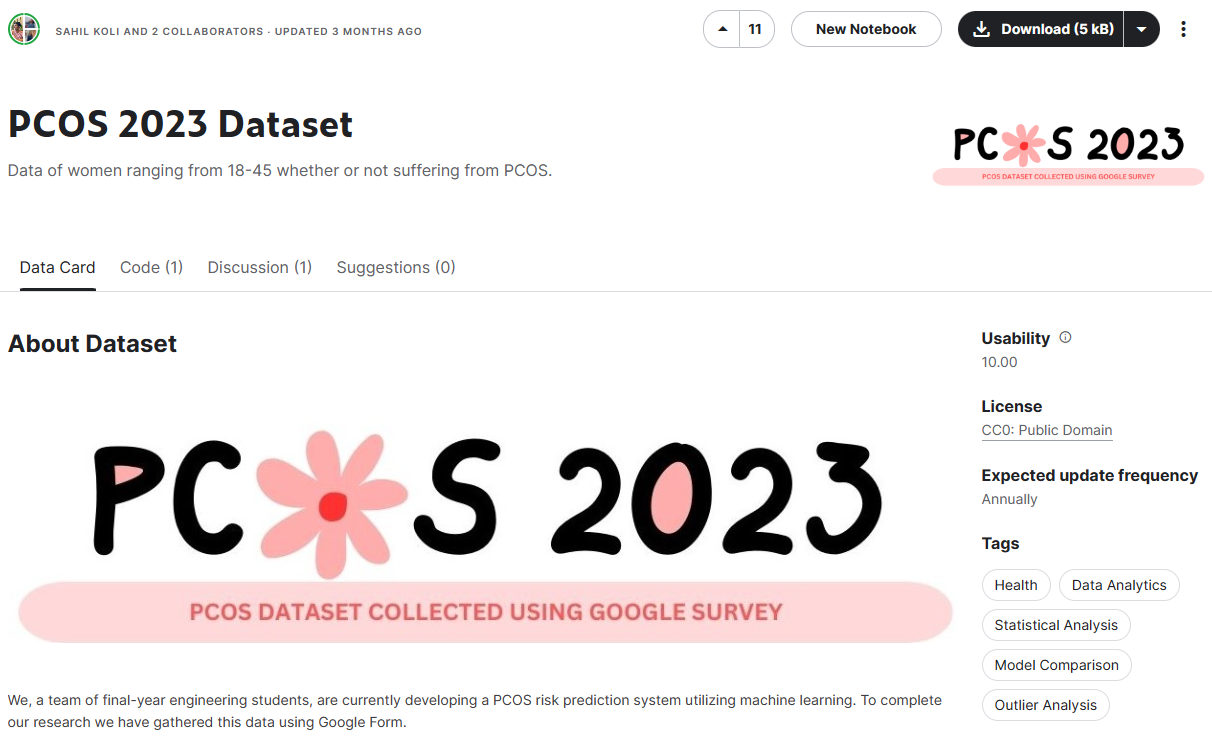

O dataset 2 [PCOS 2023 Dataset](https://www.kaggle.com/datasets/sahilkoli04/pcos2023) contém dados de 465 mulheres de 18 a 45 anos que responderam a um questionário coletado via Google Forms com perguntas simples, relacionando os sintomas mais comuns da doença. 

Temos 15 atributos que são informações coletadas de forma não invasiva, e nota-se que esse dataset possui menos features em comparação com o dataset 1. 

Também vale ressaltar que esse dataset é bem recente, publicado em 2023, e assim não identificamos artigos que fizessem uso dele. Ele, assim como o dataset 1, não foi publicado em conjunto com um artigo, o que poderia fazer com que nós questionássemos a validade desses dados, mas a descrição feita no Kaggle é aceitável e acompanha um vídeo que mostra como o processo de coleta dos dados foi feito. 

Também encontramos aqui um cenário bem diferente em relação ao dataset 1. Temos somente 15 atributos, que são relacionados somente à disfunção menstrual e ao hiperandrogenismo clínico.

Embora nós tenhamos menos informações, elas não são invasivas e são de fácil obtenção. Então nós poderíamos pensar em um sistema de triagem, em que as pacientes respondessem a perguntas simples e diretas, e a partir disso fossem encaminhadas para exames específicos para SOP ou a doença fosse descartada.


##### Importando dados e exibindo

In [15]:
dataset_2 = pd.read_csv("../data/dataset2-pcos-2023.csv")
dataset_2.head()

,Age (in Years),Weight (in Kg),Height (in Cm / Feet),Can you tell us your blood group ?,After how many months do you get your periods?\n(select 1- if every month/regular),Have you gained weight recently?,Do you have excessive body/facial hair growth ?,Are you noticing skin darkening recently?,Do have hair loss/hair thinning/baldness ?,Do you have pimples/acne on your face/jawline ?,Do you eat fast food regularly ?,Do you exercise on a regular basis ?,Have you been diagnosed with PCOS/PCOD?,Do you experience mood swings ?,Are your periods regular ?,"How long does your period last ? (in Days)\nexample- 1,2,3,4....."
0,21,47.0,168.0,13,1,0,0,0,0,0,0,0,0,1,1,6
1,21,45.0,156.0,11,1,0,0,1,1,1,0,0,0,1,1,4
2,17,37.0,162.0,15,1,0,0,0,0,1,1,0,0,1,1,6
3,28,54.0,160.0,15,1,0,0,0,0,0,0,0,0,1,1,4
4,45,40.0,150.0,13,2,0,0,0,1,0,0,0,1,1,0,7


Já é possível observar que o dataset 2 possui menos features que o dataset 1, mas que muitas perguntas são comuns a ambos.

##### Pré-processamento e Análise Exploratória dos Dados

In [16]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Age (in Years)                                                                     465 non-null    int64  
 1   Weight (in Kg)                                                                     465 non-null    float64
 2   Height (in Cm / Feet)                                                              465 non-null    float64
 3   Can you tell us your blood group ?                                                 465 non-null    int64  
 4   After how many months do you get your periods?
(select 1- if every month/regular)  465 non-null    int64  
 5   Have you gained weight recently?                                                   465 non-null    int64  

Organizando os nomes das colunas:

In [17]:
dataset_2=dataset_2.rename(columns={"Age (in Years)": "Idade",
                   "Weight (in Kg)": "Peso",
                   "Height (in Cm / Feet)": "Altura",
                   "Can you tell us your blood group ?": "Grupo ABO",
                   "After how many months do you get your periods?\n(select 1- if every month/regular)": "Intervalo entre ciclos",
                   "Have you gained weight recently?": "Ganho de peso",
                   "Are you noticing skin darkening recently?": "Hiperpigmentação da pele",
                   "Do have hair loss/hair thinning/baldness ?": "Queda de cabelo",
                   "Do you have pimples/acne on your face/jawline ?": "Acne",
                   "Do you eat fast food regularly ?": "Fast food regular",
                   "Do you exercise on a regular basis ?": "Atividade física regular",
                   "Have you been diagnosed with PCOS/PCOD?": "Diagnóstico SOP",
                   "Do you experience mood swings ?": "Alterações comportamentais",
                   "Are your periods regular ?": "Menstruação regular",
                   "Do you have excessive body/facial hair growth ?": "Hirsutismo",
                   "How long does your period last ? (in Days)\nexample- 1,2,3,4.....": "Duração do período menstrual",
                  })
dataset_2=dataset_2.drop(columns=['Intervalo entre ciclos','Alterações comportamentais']) # excluindo features

In [18]:
dataset_1 = dataset_1[sorted(dataset_1.columns)]

dataset_1.info()
dataset_1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 0 to 540
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Acne                          539 non-null    int64  
 1   Altura                        539 non-null    float64
 2   Atividade física regular      539 non-null    int64  
 3   Diagnóstico SOP               539 non-null    int64  
 4   Duração do período menstrual  539 non-null    int64  
 5   Fast food regular             539 non-null    int32  
 6   Ganho de peso                 539 non-null    int64  
 7   Grupo ABO                     539 non-null    int64  
 8   Hiperpigmentação da pele      539 non-null    int64  
 9   Hirsutismo                    539 non-null    int64  
 10  Idade                         539 non-null    int64  
 11  Menstruação regular           539 non-null    int64  
 12  Peso                          539 non-null    float64
 13  Queda de c

,Acne,Altura,Atividade física regular,Diagnóstico SOP,Duração do período menstrual,Fast food regular,Ganho de peso,Grupo ABO,Hiperpigmentação da pele,Hirsutismo,Idade,Menstruação regular,Peso,Queda de cabelo
0,0,152.0,0,0,5,1,0,15,0,0,28,1,44.6,0
1,0,161.5,0,0,5,0,0,15,0,0,36,1,65.0,0
2,1,165.0,0,1,5,1,0,11,0,0,33,1,68.8,1
3,0,148.0,0,0,5,0,0,13,0,0,37,1,65.0,0
4,0,161.0,0,0,5,0,0,11,0,0,25,1,52.0,1


O dataset não tem valores nulos, e em geral está bem organizado.

Exportando os dados pré-processados:

In [19]:
dataset_2.to_csv('../data/dataset2-preproc.csv', index=False)